In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import datetime

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,median_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
import random

from sklearn.linear_model import LinearRegression

In [18]:
reading_other= pd.read_csv('Data/MonthlyStore.csv')
reading_other.head()

,Row number,Date,Number,sales,profit,Bottles_Sold,Volume_Sold
0,1,January 2012,2106,75433.57,1462.38,5532,5032.95
1,2,January 2012,2113,1945.61,151.56,246,215.50
2,3,January 2012,2130,61562.72,1301.03,4791,3910.20
3,4,January 2012,2132,12619.20,600.65,966,979.97
4,5,January 2012,2152,6660.08,443.45,540,584.01


In [4]:
#represent month in date field as its first day
reading_other['Date'] = pd.to_datetime(reading_other['Date'])


In [5]:
reading_other.dtypes

Row number              object
Date            datetime64[ns]
Number                   int64
sales                  float64
profit                 float64
Bottles_Sold             int64
Volume_Sold            float64
dtype: object

In [20]:
#create a new column which is only the month and year
#begin by creating a new df in case I have to go back
cityData1 = reading_other

#add the new column
cityData1['monthYear'] = pd.to_datetime(cityData1['Date']).dt.to_period('M')

#display the df
cityData1.head()

,Row number,Date,Number,sales,profit,Bottles_Sold,Volume_Sold,monthYear
0,1,January 2012,2106,75433.57,1462.38,5532,5032.95,2012-01
1,2,January 2012,2113,1945.61,151.56,246,215.50,2012-01
2,3,January 2012,2130,61562.72,1301.03,4791,3910.20,2012-01
3,4,January 2012,2132,12619.20,600.65,966,979.97,2012-01
4,5,January 2012,2152,6660.08,443.45,540,584.01,2012-01


In [7]:
#in order to use the df for the model, group all sales by the monthYear.    The Date column will no longer be needed
cityData2 = cityData1.groupby("Date").agg({"sales":'sum'})
cityData2.head()

#NOTE:   this df will be used for the 2nd and 3rd parts of the model.  Do not overwrite the df.
#The 1st part of the model will used the date in an object format (not datetime format).  

,sales
Date,
2012-01-01,15916194.22
2012-02-01,18116104.07
2012-03-01,18139545.75
2012-04-01,20004896.97
2012-05-01,22193521.24


In [8]:

#make the index a column
cityData3 = cityData2.rename_axis('monthYear').reset_index()
cityData3.head()

,monthYear,sales
0,2012-01-01,15916194.22
1,2012-02-01,18116104.07
2,2012-03-01,18139545.75
3,2012-04-01,20004896.97
4,2012-05-01,22193521.24


In [10]:
cityDateObj = cityData3

In [11]:
#Begin by adding  new columns which will contain the month and day as an object.
cityDateObj['monthYearStr'] = cityData3['monthYear'].dt.strftime('%Y/%m/%d')

In [12]:
cityDateObj.head()

,monthYear,sales,monthYearStr
0,2012-01-01,15916194.22,2012/01/01
1,2012-02-01,18116104.07,2012/02/01
2,2012-03-01,18139545.75,2012/03/01
3,2012-04-01,20004896.97,2012/04/01
4,2012-05-01,22193521.24,2012/05/01


In [14]:
#Create a new df with ONLY the date as an object and the sales
cityDateObj2 = cityDateObj[['monthYear', 'sales']].copy()

In [15]:
cityDateObj2.head()

,monthYear,sales
0,2012-01-01,15916194.22
1,2012-02-01,18116104.07
2,2012-03-01,18139545.75
3,2012-04-01,20004896.97
4,2012-05-01,22193521.24


In [21]:
cityDateObj2.dtypes

monthYear    datetime64[ns]
sales               float64
dtype: object

   monthYear        sales
0 2012-01-01  15916194.22
1 2012-02-01  18116104.07
2 2012-03-01  18139545.75
3 2012-04-01  20004896.97
4 2012-05-01  22193521.24


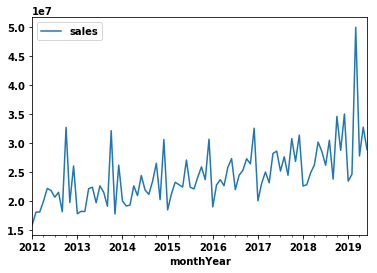

In [23]:
print(cityDateObj2.head())
cityDateObj2.plot(x='monthYear',y='sales')
plt.show()

C:\Users\francis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\francis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   89
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -1489.961
Method:                       css-mle   S.D. of innovations        4487427.782
Date:                Tue, 06 Aug 2019   AIC                           2989.922
Time:                        20:14:05   BIC                           3002.366
Sample:                    02-01-2012   HQIC                          2994.938
                         - 06-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.456e+05   1.77e+05      0.823      0.413   -2.01e+05    4.93e+05
ar.L1.D.sales    -0.9544      0.105     -9.061      0.000      -1.161      -0.748
ar.L2.D.sales    -0.5427      0.138     

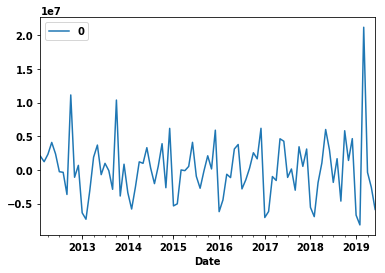

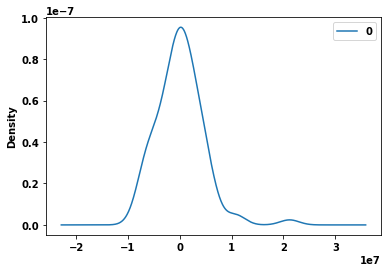

                  0
count  8.900000e+01
mean   8.129621e+04
std    4.515517e+06
min   -8.170727e+06
25%   -2.726288e+06
50%   -8.007624e+03
75%    2.375292e+06
max    2.118492e+07


In [26]:
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
from pandas import DataFrame
import statsmodels.api as sm

#This model needs a datetime format for the date; therefore, use the cityData2 df.

# fit model
model = ARIMA(cityData2, order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=26869296.391506, expected=32574086.690000
predicted=27688214.102276, expected=20068372.860000
predicted=30144757.472403, expected=23086289.250000
predicted=24940922.106477, expected=25019491.260000
predicted=23536745.615691, expected=23176630.270000
predicted=24135098.471615, expected=28227485.870000
predicted=24564787.585564, expected=28626061.960000
predicted=27008015.325137, expected=25200614.710000
predicted=28175615.776392, expected=27647610.170000
predicted=27083044.231013, expected=24463707.550000
predicted=26996424.314507, expected=30779422.100000
predicted=26477464.682571, expected=26848928.020000
predicted=28709572.386742, expected=31385430.790000
predicted=28707741.093658, expected=22606806.940000
predicted=29691816.611003, expected=22861176.420000
predicted=25591098.522541, expected=24873041.230000
predicted=23920524.796460, expected=26214746.690000
predicted=24603585.858445, expected=30180818.390000
predicted=26547913.118078, expected=28574027.260000
predicted=28

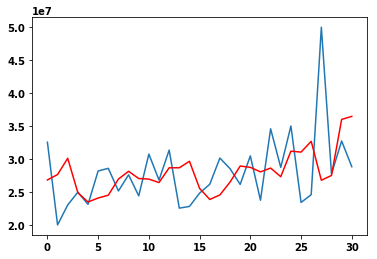

In [28]:
from sklearn.metrics import mean_squared_error

#This model needs a datetime format for the date; therefore, use the cityData2 df.

X = cityData2.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()